<a href="https://colab.research.google.com/github/richa1288/Data-Analysis/blob/main/Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


#Loading our data:
sales = pd.read_csv(
    '/content/drive/MyDrive/DataAnalysis/sales_data.csv',
    parse_dates=['Date'])
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


In [2]:
sales.shape

(85872, 18)

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85872 entries, 0 to 85871
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              85872 non-null  datetime64[ns]
 1   Day               85872 non-null  int64         
 2   Month             85872 non-null  object        
 3   Year              85872 non-null  int64         
 4   Customer_Age      85872 non-null  int64         
 5   Age_Group         85872 non-null  object        
 6   Customer_Gender   85872 non-null  object        
 7   Country           85872 non-null  object        
 8   State             85872 non-null  object        
 9   Product_Category  85872 non-null  object        
 10  Sub_Category      85872 non-null  object        
 11  Product           85872 non-null  object        
 12  Order_Quantity    85871 non-null  float64       
 13  Unit_Cost         85871 non-null  float64       
 14  Unit_Price        8587

# Statistical Properties of Data

In [ ]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,85872.000000,85872.000000,85872.000000,85871.000000,85871.000000,85871.000000,85871.000000,85871.000000,85871.000000
mean,15.644680,2014.348484,36.017957,11.464720,304.192440,518.285242,322.976139,540.216336,863.192475
std,8.791649,1.313708,10.820442,9.562761,583.390494,983.628352,484.436326,932.173035,1384.041733
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,3.000000,9.000000,40.000000,40.000000,91.000000
50%,16.000000,2014.000000,35.000000,10.000000,13.000000,35.000000,137.000000,160.000000,336.000000
75%,23.000000,2016.000000,43.000000,20.000000,308.000000,540.000000,397.000000,598.000000,940.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,5638.000000,8684.000000,14312.000000


#Unit Cost

In [ ]:
sales['Unit_Cost'].describe()

count    85871.000000
mean       304.192440
std        583.390494
min          1.000000
25%          3.000000
50%         13.000000
75%        308.000000
max       2171.000000
Name: Unit_Cost, dtype: float64

In [ ]:
sales['Unit_Cost'].mean()

304.1924398225245

In [ ]:
sales['Unit_Cost'].median()

13.0

# Outlier in Unit cost (500 $ is an outlier)

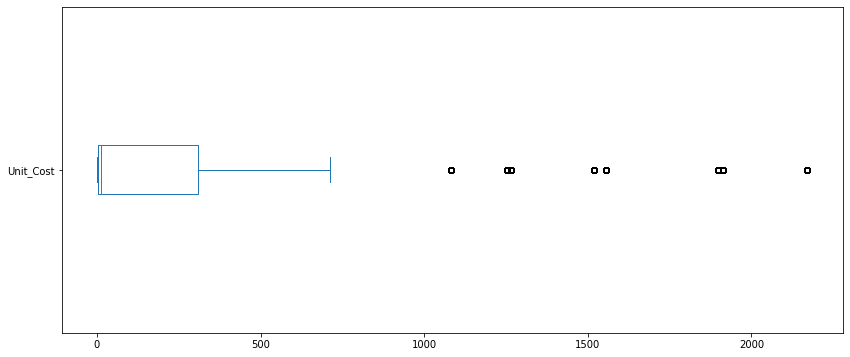

In [ ]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

# Density Plot

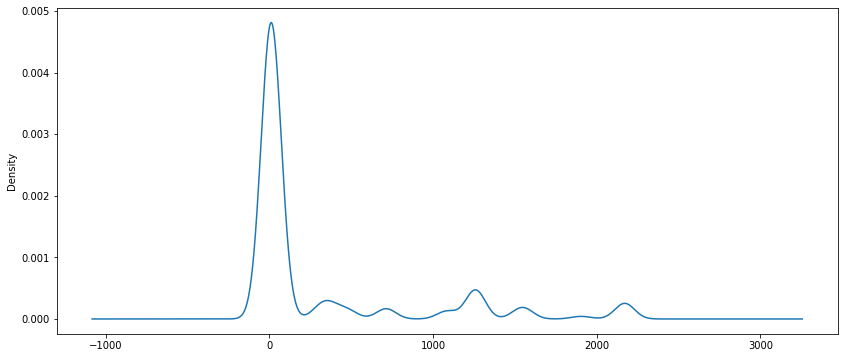

In [ ]:
sales['Unit_Cost'].plot(kind='density', figsize=(14,6))

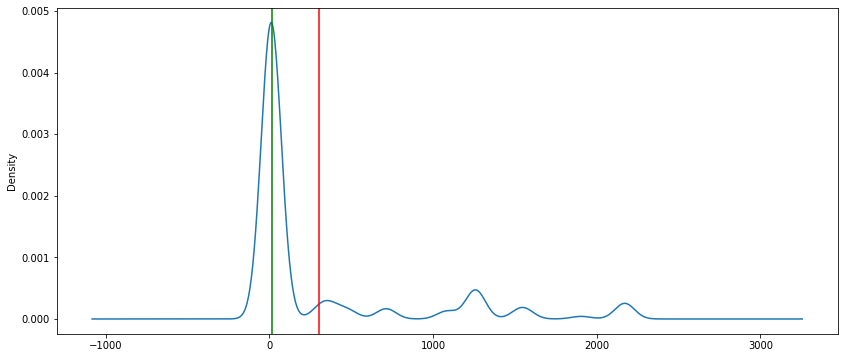

In [ ]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')

Text(0.5, 0, 'dollars')

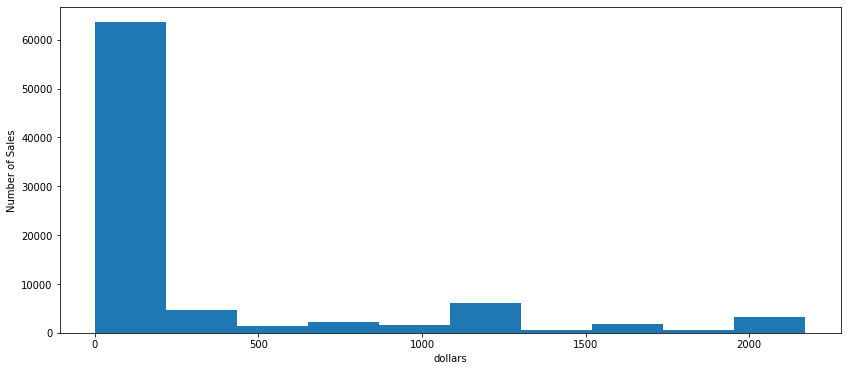

In [ ]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


In [4]:
sales['Age_Group'].value_counts()

Adults (35-64)          42812
Young Adults (25-34)    30056
Youth (<25)             12522
Seniors (64+)             482
Name: Age_Group, dtype: int64

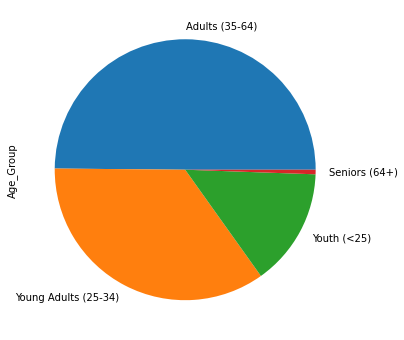

In [5]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Sales')

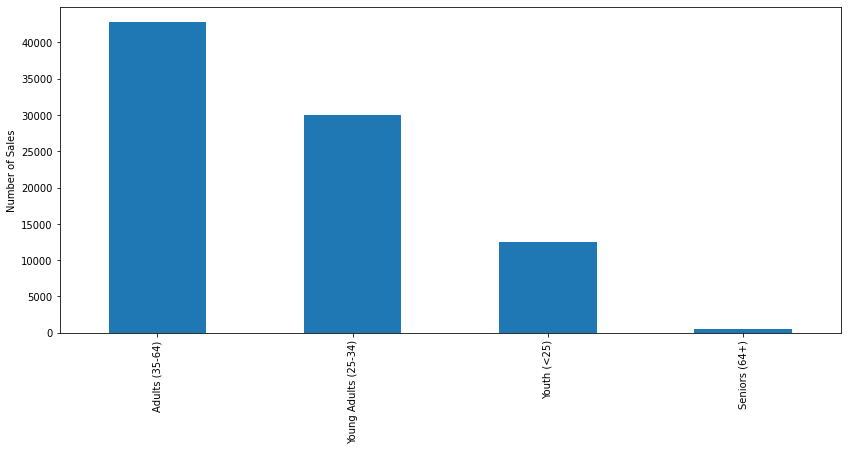

In [6]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

#Correlation

In [7]:
corr = sales.corr()

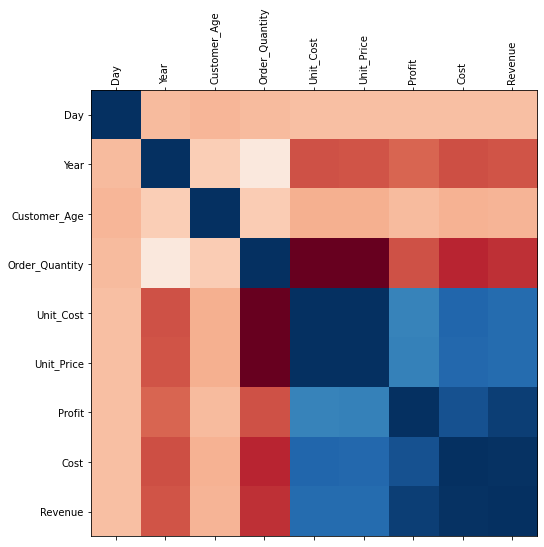

In [8]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

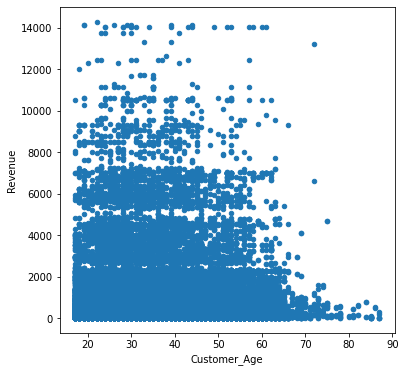

In [9]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

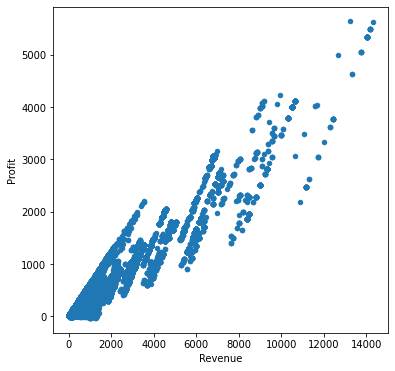

In [10]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Profit')

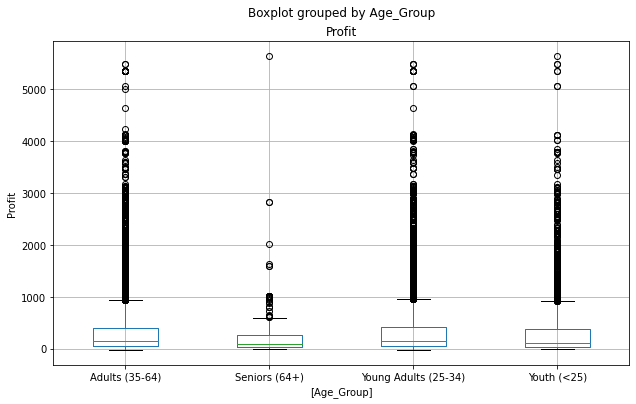

In [11]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

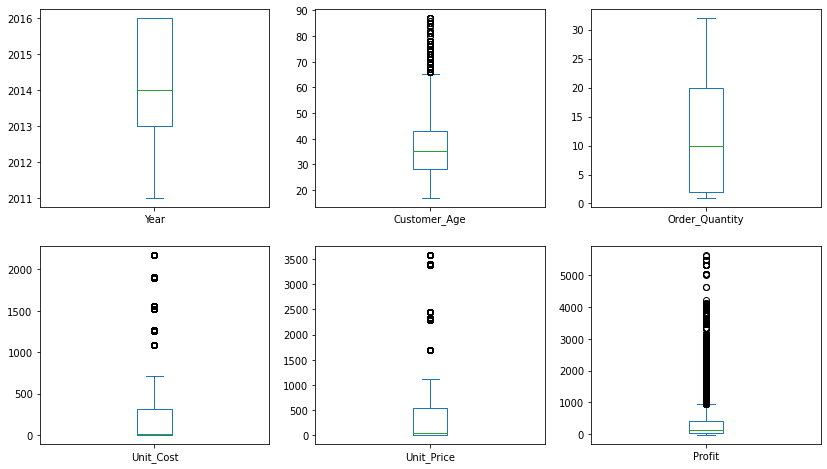

In [12]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

In [13]:
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']

sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

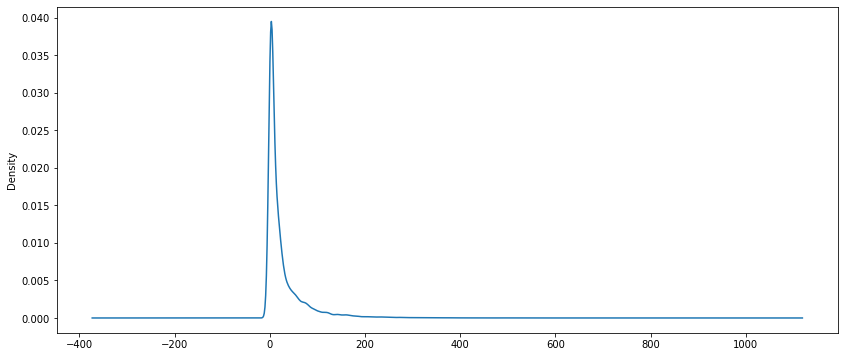

In [14]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

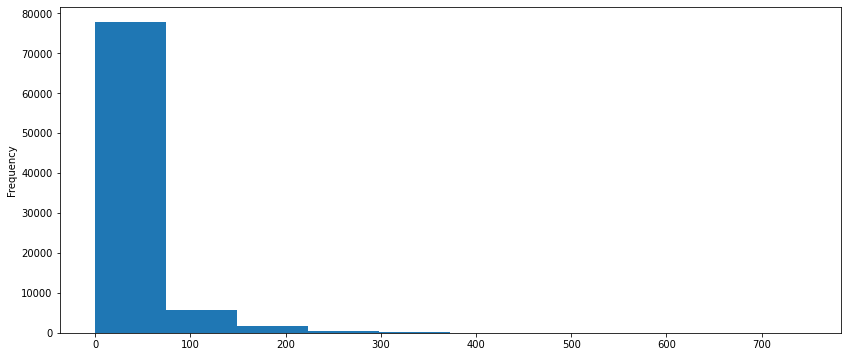

In [15]:
sales['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))

# New Parameter calculated cost

In [16]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

sales['Calculated_Cost'].head()

0     360.0
1     360.0
2    1035.0
3     900.0
4     180.0
Name: Calculated_Cost, dtype: float64

In [17]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

1

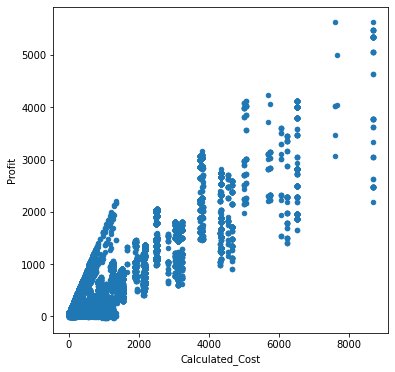

In [18]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

In [19]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']

sales['Calculated_Revenue'].head()


0     950.0
1     950.0
2    2401.0
3    2088.0
4     418.0
Name: Calculated_Revenue, dtype: float64

In [20]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

1

In [21]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,50.000000,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,50.000000,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0,49.000000,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0,42.612245,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0,8.893617,180.0,418.0


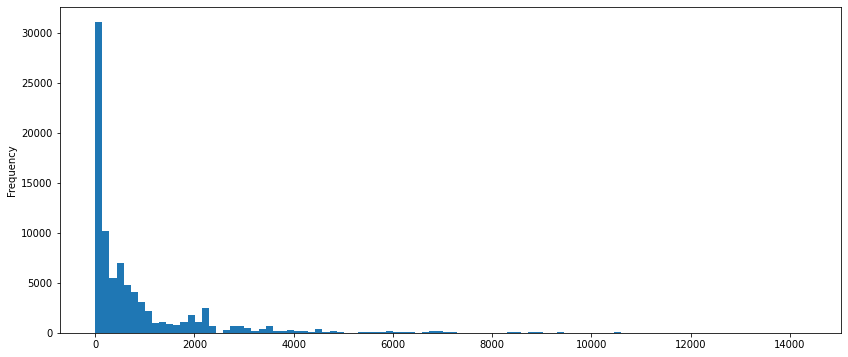

In [22]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

In [23]:
sales['Unit_Price'].head()

0    120.0
1    120.0
2    120.0
3    120.0
4    120.0
Name: Unit_Price, dtype: float64

In [24]:
#sales['Unit_Price'] = sales['Unit_Price'] * 1.03

sales['Unit_Price'] *= 1.03

In [25]:
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

In [26]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1.0,45.0,123.60,63.0,45.0,108.0,2.700,45.0,108.0
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1.0,45.0,123.60,63.0,45.0,108.0,2.700,45.0,108.0
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12.0,8.0,22.66,142.0,96.0,238.0,5.950,96.0,238.0
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14.0,8.0,22.66,165.0,112.0,277.0,6.925,112.0,277.0
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29.0,13.0,36.05,537.0,377.0,914.0,22.850,377.0,914.0
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",31.0,13.0,36.05,574.0,403.0,977.0,24.425,403.0,977.0
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,2.0,11.0,30.90,32.0,22.0,54.0,1.350,22.0,54.0
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,21.0,11.0,30.90,336.0,231.0,567.0,14.175,231.0,567.0
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,1.0,11.0,30.90,16.0,11.0,27.0,0.675,11.0,27.0
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,18.0,11.0,30.90,288.0,198.0,486.0,12.150,198.0,486.0


In [27]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

853.7265252732878

In [28]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

55334

In [ ]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

In [30]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787.0
51     787.0
52    2957.0
53    2851.0
60     626.0
Name: Revenue, dtype: float64

In [31]:
#sales.loc[sales['Country'] == 'France', 'Revenue'] = sales.loc[sales['Country'] == 'France', 'Revenue'] * 1.1

sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1

In [32]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64